# Need to find a way to plot with 'contours' instead of 'areas' (the latter of which is used in native notebook

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline
pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
pl.rcParams['xtick.labelsize'] = 7
pl.rcParams['ytick.labelsize'] = 7
pl.rcParams['axes.labelsize'] = 7
pl.rcParams['font.size'] = 7

# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'spatial_footprints'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
# load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
'''vars_pre = {}
folder = '../sepodor_pre/notebooks/autorestore/preprocessing/'
for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'is_rewardt', 'is_shockt', 'is_odor5', 'traces', 'contours',
            '_ons', '_offs',
            'odor3_ons', 'odor3_offs',
            'odor5_ons', 'odor5_offs',
            'STIM_START', 'CYCLE_START', 'STIM_DURATION', 'STIM_END', 'contours'): 
    vars_pre.update({var:ut.load_variable(var, folder=folder)})
folder = '../sepodor_pre/notebooks/autorestore/selectivity/'
for var in ('selectivity', 'tuned_', 'tuned_odor3', 'tuned_odor5'): 
    vars_pre.update({var:ut.load_variable(var, folder=folder)})

    
vars_post = {}
folder = '../sepodor_post/notebooks/autorestore/preprocessing'
for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'is_rewardt', 'is_shockt', 'is_odor5', 'traces',
            'contours',
            '_ons', '_offs',
            'odor3_ons', 'odor3_offs',
            'odor5_ons', 'odor5_offs',
            'STIM_START', 'CYCLE_START', 'STIM_DURATION', 'STIM_END'):
    vars_post.update({var:ut.load_variable(var, folder=folder)})
folder = '../sepodor_post/notebooks/autorestore/selectivity/'
for var in ('selectivity', 'tuned_', 'tuned_odor3', 'tuned_odor5'): 
    vars_post.update({var:ut.load_variable(var, folder=folder)})


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-5-5bf8894c86f0>, line 25)

In [6]:
vars_pre = {}
folder = '../day1/sucroseAndShock/notebooks/autorestore/preprocessing_SucroseAndShock/'
for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'licks',
            'is_rewardt', 'is_shockt', 'contours',
            'CYCLE_START',
            'US_START', 'US_DURATION', 'US_END'): 
    vars_pre.update({var:ut.load_variable(var, folder=folder)})
#vars_pre.update({'selectivity':ut.load_variable('selectivity', '../day1/sucroseAndShock/notebooks/autorestore/selectivity_SucroseAndShock/')})
selectivity_pre = {}
selectivity_pre.update(ut.load_variable('selectivity', '../day1/sucroseAndShock/notebooks/autorestore/selectivity_SucroseAndShock/'))


vars_post = {}
folder = '../day2/sucroseAndShock/notebooks/autorestore/preprocessing_SucroseAndShock/'
for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'licks',
            'is_rewardt', 'is_shockt','contours',
            'CYCLE_START',
            'US_START', 'US_DURATION', 'US_END'): 
    vars_post.update({var:ut.load_variable(var, folder=folder)})
selectivity_post = {}
selectivity_post.update(ut.load_variable('selectivity', '../day2/sucroseAndShock/notebooks/autorestore/selectivity_SucroseAndShock/'))
#vars_post.update({'selectivity':ut.load_variable('selectivity', '../day2/sucrose and shock/notebooks/autorestore/selectivity_SucroseAndShock/')})

In [7]:
input_CellReg_filename = '../data/CellReg/SS/cellreg.txt'

In [8]:
output_filename = input_CellReg_filename.split('.')[0]+'cellreg_dict.txt'
with open(input_CellReg_filename, 'r') as f:
    header = f.readline()
sessions = header.split()[1:]
cellreg = np.loadtxt(input_CellReg_filename)

#cellreg_dict = dict(zip(sessions, [map(int, c) for c in cellreg.T]))
cellreg_dict = dict(zip(['pre', 'post'], [map(int, c) for c in cellreg.T]))

import json
with open(output_filename, 'w+') as f:
    json.dump(cellreg_dict, f)

In [9]:
conditions = ['pre', 'post']
cellregs = dict(zip(conditions, [ut.load_cellreg_dict('cellreg_dict.txt', c) for c in conditions]))

In [10]:
import scipy.stats as sstats

In [11]:
'''rhos = []
for cell_pre, cell_post in zip(cellregs['pre'], cellregs['post']):
    
    rhos_od = []
    for isopre, isopost in zip([vars_pre['is_rewardt'], vars_pre['is_shockt'], vars_pre['is_odor5']],
                               [vars_post['is_rewardt'], vars_post['is_shockt'], vars_post['is_odor5']]):
        alldffspre = ut.compute_all_dffs(vars_pre['time_ax'], vars_pre['events'], cell_pre,
                                         vars_pre['cycles'][isopre], vars_pre['time_ax_single'])
        alldffspost = ut.compute_all_dffs(vars_post['time_ax'], vars_post['events'], cell_post,
                                          vars_post['cycles'][isopost], vars_post['time_ax_single'])

        mpre = np.mean(alldffspre, 0)
        mpost = np.mean(alldffspost, 0)
        
        t_pre, t_post = [vars_pre['STIM_DURATION']]*2
        t_filter_pre = (vars_pre['time_ax_single']>-t_pre) * (vars_pre['time_ax_single']<vars_pre['STIM_DURATION']+t_post)
        t_pre, t_post = [vars_post['STIM_DURATION']]*2
        t_filter_post = (vars_post['time_ax_single']>-t_pre) * (vars_post['time_ax_single']<vars_post['STIM_DURATION']+t_post)
        rhos_od.append(sstats.pearsonr(mpre[t_filter_pre], mpost[t_filter_post])[0])
    rhos.append(rhos_od)
    
    print ".",
rhos = np.r_[rhos]

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-11-411804d75929>, line 23)

In [12]:
rhos = []
for cell_pre, cell_post in zip(cellregs['pre'], cellregs['post']):
    
    rhos_od = []
    for isopre, isopost in zip([vars_pre['is_rewardt'], vars_pre['is_shockt']],
                               [vars_post['is_rewardt'], vars_pre['is_shockt']]):
        alldffspre = ut.compute_all_dffs(vars_pre['time_ax'], vars_pre['events'], cell_pre,
                                         vars_pre['cycles'][isopre], vars_pre['time_ax_single'])
        alldffspost = ut.compute_all_dffs(vars_post['time_ax'], vars_post['events'], cell_post,
                                          vars_post['cycles'][isopost], vars_post['time_ax_single'])

        mpre = np.mean(alldffspre, 0)
        mpost = np.mean(alldffspost, 0)
        
        t_pre, t_post = [vars_pre['US_DURATION']]*2
        t_filter_pre = (vars_pre['time_ax_single']>-t_pre) * (vars_pre['time_ax_single']<vars_pre['US_DURATION']+t_post)
        t_pre, t_post = [vars_post['US_DURATION']]*2
        t_filter_post = (vars_post['time_ax_single']>-t_pre) * (vars_post['time_ax_single']<vars_post['US_DURATION']+t_post)
        rhos_od.append(sstats.pearsonr(mpre[t_filter_pre], mpost[t_filter_post])[0])
    rhos.append(rhos_od)
    
    print ".",
rhos = np.r_[rhos]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


/home/fabios/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [13]:
best_rhos_ = cellregs['pre'][np.argsort(rhos[:, 0])[::-1]]

In [20]:
pvalue = 0.05
tuned_pre_sucrose = ut.adjust_pvalues([s[0][1] for s in selectivity_pre['reward_4s_us']])<pvalue
tuned_pre_shock = ut.adjust_pvalues([s[0][1] for s in selectivity_pre['shock_4s_us']])<pvalue
tuned_post_sucrose = ut.adjust_pvalues([s[0][1] for s in selectivity_post['reward_4s_us']])<pvalue
tuned_post_shock = ut.adjust_pvalues([s[0][1] for s in selectivity_post['shock_4s_us']])<pvalue

AttributeError: 'module' object has no attribute 'plot_spatial_footprints'

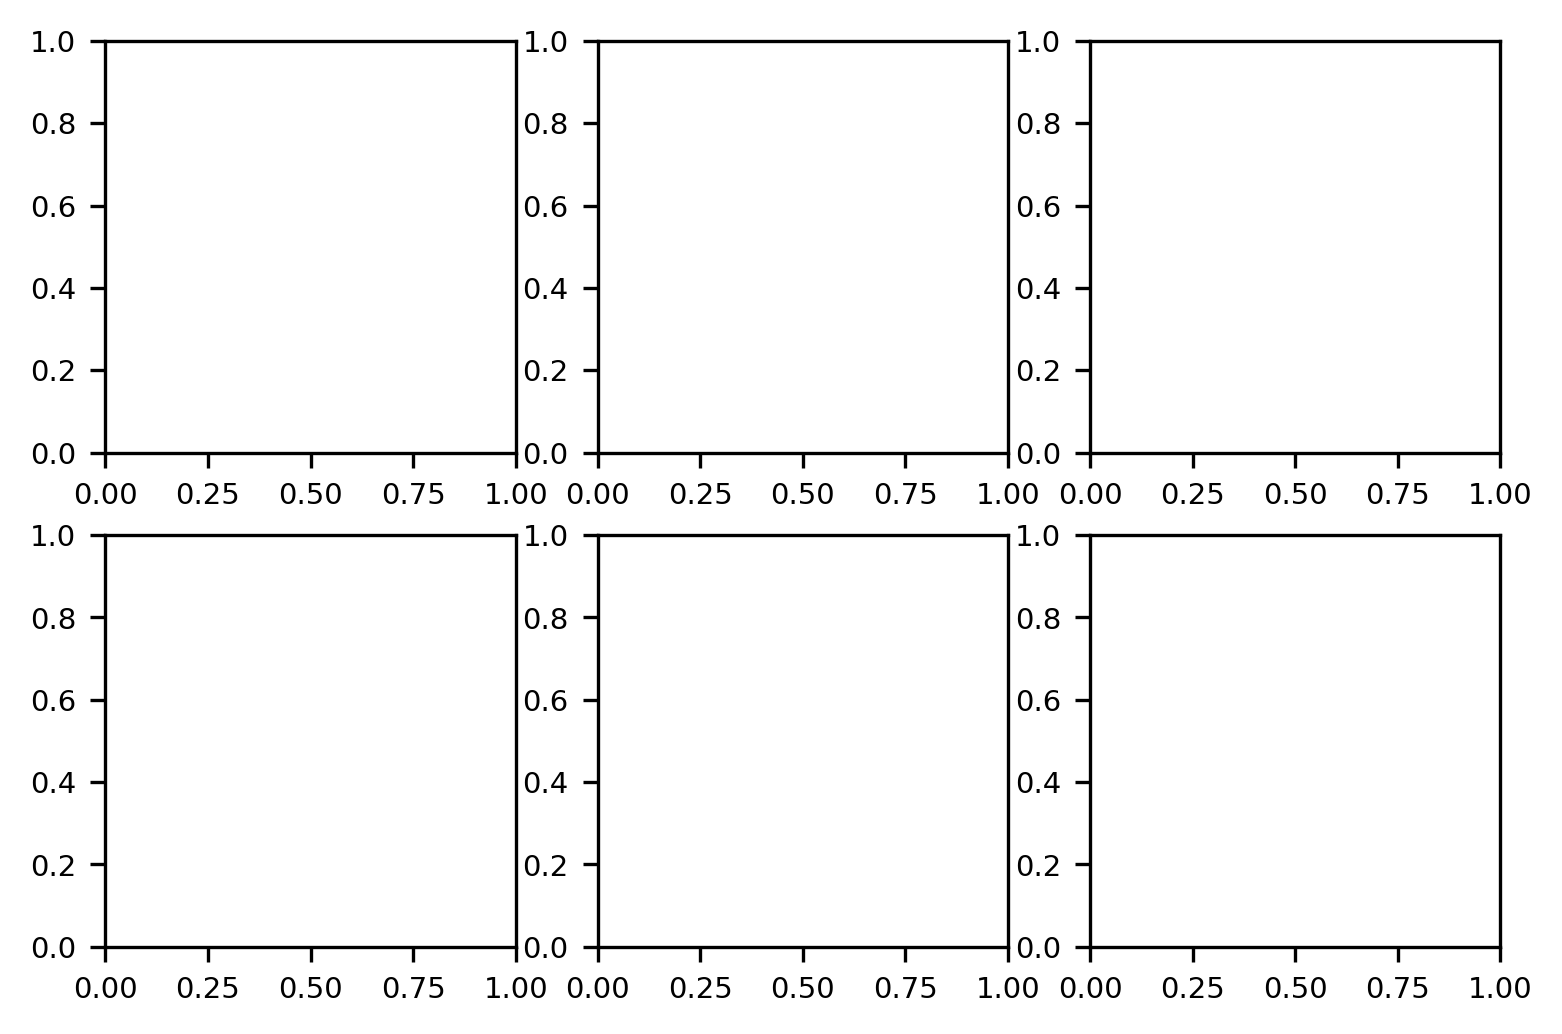

In [21]:
fig, axs = pl.subplots(2, 3, figsize=(6, 4))

pt.plot_spatial_footprints(vars_pre['contours'][cellregs['pre']],
                           [i for i, c in enumerate(cellregs['pre']) if tuned_pre_sucrose[c]],
                           background=True, color='b', ax=axs[0][0])
pt.plot_spatial_footprints(vars_pre['contours'][cellregs['pre']],
                           [i for i, c in enumerate(cellregs['pre']) if tuned_pre_shock[c]],
                           background=True, color='r', ax=axs[0][1])
pt.plot_spatial_footprints(vars_pre['contours'][cellregs['pre']],
                           [i for i, c in enumerate(cellregs['pre'])
                            if tuned_pre_sucrose[c] and not tuned_pre_shock[c]],
                           background=True, color='b', ax=axs[0][2])
pt.plot_spatial_footprints(vars_pre['contours'][cellregs['pre']],
                           [i for i, c in enumerate(cellregs['pre'])
                            if tuned_pre_shock[c] and not tuned_pre_sucrose[c]],
                           background=False, color='r', ax=axs[0][2])
pt.plot_spatial_footprints(vars_pre['contours'][cellregs['pre']],
                           [i for i, c in enumerate(cellregs['pre'])
                            if tuned_pre_shock[c] and tuned_pre_sucrose[c]],
                           background=False, color=(1, 0, 1), ax=axs[0][2])

pt.plot_spatial_footprints(vars_post['contours'][cellregs['post']],
                           [i for i, c in enumerate(cellregs['post']) if tuned_post_sucrose[c]],
                           background=True, color='b', ax=axs[1][0])
pt.plot_spatial_footprints(vars_post['contours'][cellregs['post']],
                           [i for i, c in enumerate(cellregs['post']) if tuned_post_shock[c]],
                           background=True, color='r', ax=axs[1][1])
pt.plot_spatial_footprints(vars_post['contours'][cellregs['post']],
                           [i for i, c in enumerate(cellregs['post'])
                            if tuned_post_sucrose[c] and not tuned_post_shock[c]],
                           background=True, color='b', ax=axs[1][2])
pt.plot_spatial_footprints(vars_post['contours'][cellregs['post']],
                           [i for i, c in enumerate(cellregs['post'])
                            if tuned_post_shock[c] and not tuned_post_sucrose[c]],
                           background=False, color='r', ax=axs[1][2])
pt.plot_spatial_footprints(vars_post['contours'][cellregs['post']],
                           [i for i, c in enumerate(cellregs['post'])
                            if tuned_post_shock[c] and tuned_post_sucrose[c]],
                           background=False, color=(1, 0, 1), ax=axs[1][2])

axs[0][0].set_title('Sucrose')
axs[0][1].set_title('Shock')
axs[0][2].set_title('Suc & Sh')

axs[0][0].set_ylabel('Pre')
axs[1][0].set_ylabel('Post')

fig.savefig('../img/spatial_footprints__prepost_SS_overlap.pdf')

AttributeError: 'module' object has no attribute 'plot_spatial_footprints'

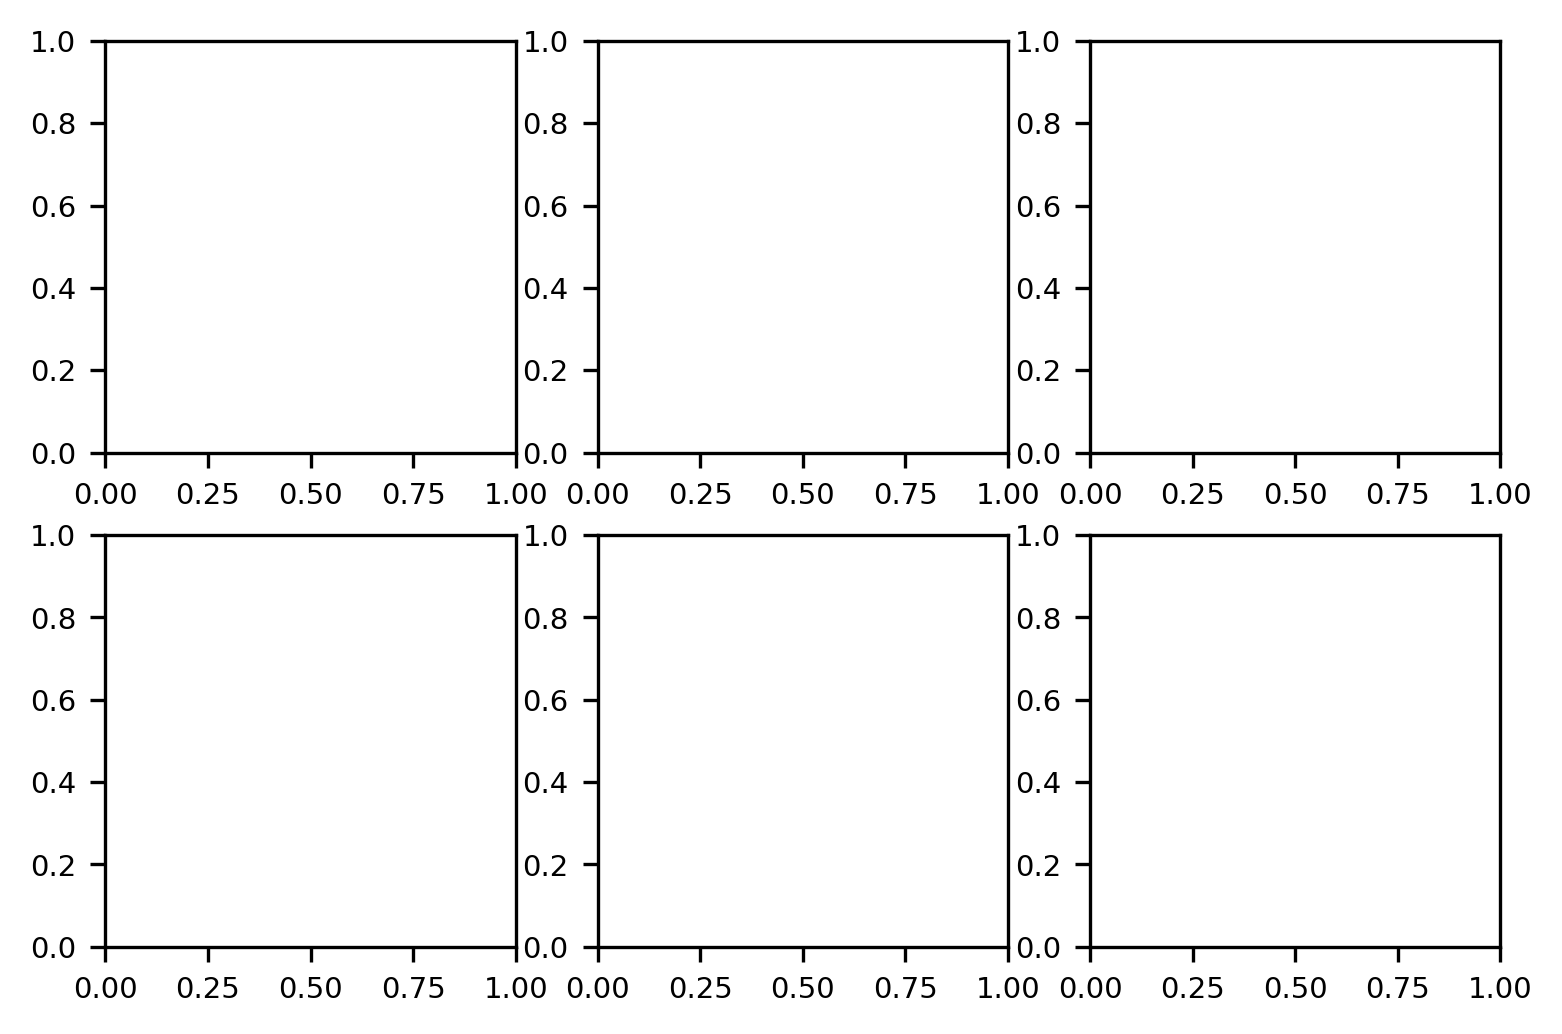

In [22]:
fig, axs = pl.subplots(2, 3, figsize=(6, 4))

pt.plot_spatial_footprints(vars_pre['contours'], np.where(tuned_pre_sucrose)[0],
                           background=True, color='b', ax=axs[0][0])
pt.plot_spatial_footprints(vars_pre['contours'], np.where(tuned_pre_shock)[0],
                           background=True, color='r', ax=axs[0][1])
pt.plot_spatial_footprints(vars_pre['contours'], np.where(tuned_pre_sucrose)[0],
                           background=True, color='b', ax=axs[0][2])
pt.plot_spatial_footprints(vars_pre['contours'], np.where(tuned_pre_shock)[0],
                           background=False, color='r', ax=axs[0][2])
pt.plot_spatial_footprints(vars_pre['contours'], np.where(tuned_pre_sucrose*tuned_pre_shock)[0],
                           background=False, color=(1, 0, 1), ax=axs[0][2])

pt.plot_spatial_footprints(vars_post['contours'], np.where(tuned_post_sucrose)[0],
                           background=True, color='b', ax=axs[1][0])
pt.plot_spatial_footprints(vars_post['contours'], np.where(tuned_post_shock)[0],
                           background=True, color='r', ax=axs[1][1])
pt.plot_spatial_footprints(vars_post['contours'], np.where(tuned_post_sucrose)[0],
                           background=True, color='b', ax=axs[1][2])
pt.plot_spatial_footprints(vars_post['contours'], np.where(tuned_post_shock)[0],
                           background=False, color='r', ax=axs[1][2])
pt.plot_spatial_footprints(vars_post['contours'], np.where(tuned_post_sucrose*tuned_post_shock)[0],
                           background=False, color=(1, 0, 1), ax=axs[1][2])

axs[0][0].set_title('Sucrose')
axs[0][1].set_title('Shock')
axs[0][2].set_title('Suc & Sh')

axs[0][0].set_ylabel('Pre')
axs[1][0].set_ylabel('Post')

fig.savefig('../img/spatial_footprints__prepost_SS_overlap_all cells.pdf')